<div style="float: right; margin: 0px 15px 15px 0px;">
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/HULT_IBS_Logo_Outline_Black_%28cropped%29.png" width=150/>
</div>
<h1> Python for Data Analysis: Methods & Tools </h1>
<em> <strong>Python for everyday people </strong></em>
<br><br>
Written by Felipe Dominguez - Professor Adjunct <br>
Hult International Business School <br>
<br>
<h1><u> Chapter 07 - Exploratory Analysis with Pandas!</u></h1>
<em> Exercise workbook - Class 07</em>

<h3>0. Understanding a dataset</h3><br>
<div align = justify>
The first step of your analysis should always be understanding and exploring your dataset. To do so, you can use the functions .head( ) and .info( ).<br><br>
Generally, these two functions, provides you with an understanding of the quality of the data and the data types of each feature (columns).

  
</div>

In [70]:
# Code 0.1.
# import pandas package (and other useful packages)
import pandas as pd                       # import pandas
import matplotlib.pyplot as plt           # Data Visualization esssentials!
import seaborn as sns                     # Enhanced Data Visualization
import numpy as np

# Storing the path to the dataset
path = '.\\__resources\\airline_passenger_satisfaction.csv'

# Reading and importing the csv file (_o =. original dataframe)
df_airlines_o = pd.read_csv(path)

# Checking results (first 5 observations)
df_airlines_o.head()



,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,0,0,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5,5,Neutral or Dissatisfied
1,2,Female,35,1,0,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5,5,Satisfied
2,3,Male,41,1,0,Business,853.0,0.0,0.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3,3,Satisfied
3,4,Male,50,1,0,Business,1905.0,0.0,0.0,2.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5,5,Satisfied
4,5,Female,49,1,0,Business,3470.0,0.0,1.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3,3,Satisfied


In [18]:
# Code 0.2.
# Information related to each feature (column)
df_airlines_o.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int64  
 4   Type of Travel                          129880 non-null  int64  
 5   Class                                   129743 non-null  object 
 6   Flight Distance                         129775 non-null  float64
 7   Departure Delay                         129870 non-null  float64
 8   Arrival Delay                           129468 non-null  float64
 9   Departure and Arrival Time Convenience  129804 non-null  float64
 10  Ease of Online Booking                  1298

In [19]:
# Code 0.2. -- Solution
# Information related to each feature (column)
df_airlines_o.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int64  
 4   Type of Travel                          129880 non-null  int64  
 5   Class                                   129743 non-null  object 
 6   Flight Distance                         129775 non-null  float64
 7   Departure Delay                         129870 non-null  float64
 8   Arrival Delay                           129468 non-null  float64
 9   Departure and Arrival Time Convenience  129804 non-null  float64
 10  Ease of Online Booking                  1298

<h3>1. Converting Data Types</h3><br>
<div align = justify>
From the info( ) method above, it can be observed that most of the columns are of numeric types. However, the 'ID', 'Customer Type', and 'Type of Travel', do not fit with the numeric type. These features are not meant to be numerically measured as they represent qualitative aspects of each observation. Therefore, these features must be converted into strings. Thus, you can minimize the risk of accidentally using them in calculations. 
</div>

Categorical values dictionary
~~~
ID              :Index position of each observation
Customer Type   : 0 - First-time ; 1 - Returning
Type of Travel  : 0 - Business   ; 1 - Personal
~~~

<div align = justify>
The most common way to convert a feature's data type is to used the method astype(). This method enables Python to change the type of a complete column. The structure is as follows:
</div>

~~~
    Single feature:
    df_name['c_name'] = df_name['c_name'].astype(datatype)

    Multiple features:
    df_name[['c_name_1',...,'column_n']] = df_name[['c_name_1', ... 'c_name_n']].astype(datatype)
~~~

In [23]:
# Code 1.1.

# Create a copy of the original dataset
df_airlines = df_airlines_o.copy()

# Transform the data type of ID, Customer Type, and Type of travel to string.
df_airlines[['ID','Customer Type','Type of Travel']] = df_airlines[['ID','Customer Type','Type of Travel']].astype('str')

# Review the new features data types.
df_airlines.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  object 
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129743 non-null  object 
 6   Flight Distance                         129775 non-null  float64
 7   Departure Delay                         129870 non-null  float64
 8   Arrival Delay                           129468 non-null  float64
 9   Departure and Arrival Time Convenience  129804 non-null  float64
 10  Ease of Online Booking                  1298

<h3>2. Descriptive Statistics</h3>
<div align = justify>
The .descriptive( ) method generates a set of descriptive statistics to help you understand the data. By default, it will return statistics for all numeric features in the DataFrame. In general, .describe( ) address the following questions:<br>
    <ul>
        <li>Does the data align with its documentation? </li>
        <li>Are there any extreme values skewing the distribution of any feature?</li>
    </ul> 
</div>

In [27]:
# Code 2.1.

# Using the default behavior of .describe()
df_airlines.describe()


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129775.000000,129870.000000,129468.000000,129804.000000,129850.000000,129818.000000,129721.000000,129858.000000,129793.000000,129827.000000,129841.000000,129834.000000,129796.000000,129861.000000,129877.000000,129880.000000,129880.000000
mean,39.427957,1190.408962,14.713814,15.092718,3.057371,2.756889,3.306406,3.252318,2.976929,3.382933,3.441457,3.350806,3.286412,3.204891,3.642217,2.728751,3.358077,3.632114
std,15.119360,997.316598,38.072137,38.468066,1.526718,1.401763,1.266438,1.350798,1.278535,1.287216,1.319256,1.316246,1.313638,1.329898,1.176646,1.329304,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Let's run descriptive statistic on the non-numeric features of the airlines dataset

In [30]:
# Code 2.2.

# Forcing to run descriptive statistics in categorical variables
df_airlines.describe(include = 'object')

# To read only Columns that you choose
df_airlines[['ID','Customer Type']].describe()


,ID,Customer Type
count,129880,129880
unique,129880,2
top,1,1
freq,1,106100


<h3>3. Analyzing Frequencies</h3><br>
<div align = justify>
Using the .describe( ) method over categorical variables does not provide a high degree of informations. To understand categorical features better, you can use the <b>Series</b> .value_counts( ) method. 
    
<em><b>Note</b>: This method will not run if given a DataFrame, as it is a <b>Series</b> method. A list can be provided instead of a single feature if multiple frequency features are required.</em>
</div>

In [31]:
# Code 3.1
help(pd.Series.value_counts)


Help on function value_counts in module pandas.core.base:

value_counts(self, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True)
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Als

In [32]:
# Code 3.2.

# Apply value_counts into Class feature.
df_airlines['Class'].value_counts()


Business        62089
Economy         58248
Economy Plus     9406
Name: Class, dtype: int64

In [40]:
# Code 3.3.
# Relativize frequencies (Class feature)
df_airlines['Class'].value_counts(normalize = True,
                                 sort = True,
                                 ascending = False,
                                 dropna = False).round(5)


Business        0.47805
Economy         0.44848
Economy Plus    0.07242
NaN             0.00105
Name: Class, dtype: float64

In [44]:
# Code 3.4.
# Use value_counts on Customer Type and Type of Travel
df_airlines[['Customer Type','Type of Travel']].value_counts()

Customer Type  Type of Travel
1              0                 66114
               1                 39986
0              0                 23579
               1                   201
dtype: int64

In [46]:
# To count each columns you must do a Loop
for column in df_airlines.columns:
    print(df_airlines[column].value_counts())

1         1
86583     1
86596     1
86595     1
86594     1
         ..
43289     1
43288     1
43287     1
43286     1
129880    1
Name: ID, Length: 129880, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64
1    106100
0     23780
Name: Customer Type, dtype: int64
0    89693
1    40187
Name: Type of Travel, dtype: int64
Business        62089
Economy         58248
Economy Plus     9406
Name: Class, dtype: int64
337.0     840
594.0     505
404.0     479
862.0     473
2475.0    466
         ... 
400.0       1
1429.0      1
1469.0      1
1392.0      1
1051.0      1
Name: Flight Distance, Length: 3821, dtype: int64
0.0      73351
1.0       3681
2.0       2855
3.0       2535
4.0       2309
         ...  
566.0        1
501.0        1
460.0        1
455.0        1
359.0        1
Name: Departure Delay, Length: 466, d

<h3>4. Chaining Methods</h3>
The chaining method is the process of liking methods together using dots. This is a very useful technique for missing value detection. <br>
The following is an example of a method chain that returns <em>True</em> or <em>False</em>, depending on whether or not a feature contains missing values. It can be interpreted as follows:
<br>

* Take the diamonds dataset,
* <strong>and then</strong> check to see if a value <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html">is_null(&nbsp;)</a>,
* <strong>and then</strong>, aggregate to display whether or not <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html">any(&nbsp;)</a> null values exist per feature.

In [49]:
# Code 4.1.
# Find if there are any null values in each feature
print(df_airlines.isnull().any(axis = 0))

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                      True
Flight Distance                            True
Departure Delay                            True
Arrival Delay                              True
Departure and Arrival Time Convenience     True
Ease of Online Booking                     True
Check-in Service                           True
Online Boarding                            True
Gate Location                              True
On-board Service                           True
Seat Comfort                               True
Leg Room Service                           True
Cleanliness                                True
Food and Drink                             True
In-flight Service                          True
In-flight Wifi Service                  

<b>Let's take a look at each step separate</b>

In [52]:
# Code 4.2.
# Step 1: Printing the first 6 columns
df_airlines.iloc[:, 0:7]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance
0,1,Male,48,0,0,Business,821.0
1,2,Female,35,1,0,Business,821.0
2,3,Male,41,1,0,Business,853.0
3,4,Male,50,1,0,Business,1905.0
4,5,Female,49,1,0,Business,3470.0
...,...,...,...,...,...,...,...
129875,129876,Male,28,1,1,Economy Plus,447.0
129876,129877,Male,41,1,1,Economy Plus,308.0
129877,129878,Male,42,1,1,Economy Plus,337.0
129878,129879,Male,50,1,1,Economy Plus,337.0


In [53]:
# Code 4.3.
# Step 2: Taking the df_airline dataset, and then checking for null values with isnull( ).
df_airlines.iloc[:, 0:7].isnull()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False
129876,False,False,False,False,False,False,False
129877,False,False,False,False,False,False,False
129878,False,False,False,False,False,False,False


In [ ]:
# Code 4.3. -- Solution
# Step 2: Taking the df_airline dataset, and then checking for null values with isnull( ).
print(df_airlines.iloc[:, 0:6].isnull())


In [54]:
# Code 4.4.
# Step 3: Taking the results of isnull( ), and then aggregating column-wise with any( ) 
# to see which features are affected by missing values.
df_airlines.iloc[:, 0:7].isnull().any(axis = 0)

ID                 False
Gender             False
Age                False
Customer Type      False
Type of Travel     False
Class               True
Flight Distance     True
dtype: bool

<h4>4.2. Let's count the number of missing values</h4>

In [57]:
# Code 4.2.1.
df_airlines.isnull().sum(axis =0)


ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                     137
Flight Distance                           105
Departure Delay                            10
Arrival Delay                             412
Departure and Arrival Time Convenience     76
Ease of Online Booking                     30
Check-in Service                           62
Online Boarding                           159
Gate Location                              22
On-board Service                           87
Seat Comfort                               53
Leg Room Service                           39
Cleanliness                                46
Food and Drink                             84
In-flight Service                          19
In-flight Wifi Service                      3
In-flight Entertainment           

<h3>5. Missing Values</h3>

<h4>5.1. Replace Missing values</h4>

In [60]:
# Code 5.1.1.
# Create a new dataframe based on df_airlines
df_airlines_rep = df_airlines.copy()

# Calculate the mean value of each feature.
mean_values = df_airlines_rep.mean().round(2)

# use the fillna method to change null values
df_airlines_rep.fillna(mean_values, inplace = True)

# Check if there is any missing value
print(df_airlines_rep.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  object 
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129743 non-null  object 
 6   Flight Distance                         129880 non-null  float64
 7   Departure Delay                         129880 non-null  float64
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  float64
 10  Ease of Online Booking                  1298

C:\Users\aronq\AppData\Local\Temp\ipykernel_11892\592201261.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df_airlines_rep.mean().round(2)


In [65]:
# Code 5.1.2.
# Store the mode of the Class feature
mode = df_airlines['Class'].mode()

# Use the fillna method to replace null values with the mode
df_airlines_rep['Class'].fillna(mode[0], inplace = True)

# Check if there is any missing value
print(df_airlines_rep.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  object 
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  float64
 7   Departure Delay                         129880 non-null  float64
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  float64
 10  Ease of Online Booking                  1298

<h4>5.2. Drop missing values</h4>

In [66]:
# Code 5.2.1.
# Create a new dataframe based on df_airlines
df_airlines_drop = df_airlines.copy()

# Use dropna to remove all null values
df_airlines_drop.dropna(inplace = True)

# Check to see if all missing values were removed
print(df_airlines_drop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128885 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      128885 non-null  object 
 1   Gender                                  128885 non-null  object 
 2   Age                                     128885 non-null  int64  
 3   Customer Type                           128885 non-null  object 
 4   Type of Travel                          128885 non-null  object 
 5   Class                                   128885 non-null  object 
 6   Flight Distance                         128885 non-null  float64
 7   Departure Delay                         128885 non-null  float64
 8   Arrival Delay                           128885 non-null  float64
 9   Departure and Arrival Time Convenience  128885 non-null  float64
 10  Ease of Online Booking                  1288

<h3>6. Visualizing Data </h3>

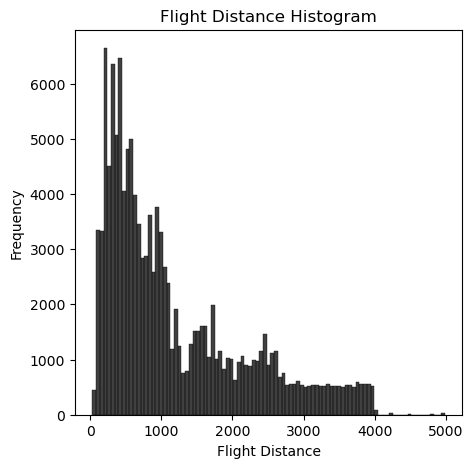

NameError: name '____' is not defined

In [74]:
# Code 13.3.3

#########################
## Setting Figure Size ##
#########################

# Setting figure size
fig, ax = plt.subplots(figsize = [5, 5])


# NEW! Plotting multiple visuals in the same plot area
plt.subplot(1, 1, 1)

# fd bins method
# histogram for Flight Distance
sns.histplot(data = df_airlines,
             x = 'Flight Distance',
             bins = 'fd',
             kde = False,
             color = 'black')

# titles and axis labels
plt.title('Flight Distance Histogram')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
             
plt.show()


############################
## Plotting Second Visual ##
############################

# plot area 2
____ # 3 rows, 1 column, space 2


# 15 bins
# histogram for Flight Distance
____


# # titles and axis labels
____
____
____


###########################
## Plotting Third Visual ##
###########################

# plot area 3
____


# 150 bins
# histogram for Flight Distance
____


# titles and axis labels
____
____
____

#########################################################
## plt.layout() and plt.show() always go at the bottom ##
#########################################################

# these compile and display the plot so that it is formatted as expected
____
____

In [ ]:
# Code 13.3.4

# setting figure size
fig, ax = plt.subplots(figsize = [8, 5])


# histogram for Flight Distance
sns.histplot(data  = df_airlines,
             x     = 'Flight Distance',
             bins  = 'fd',
             kde   = True, # drawing theoretical distribution
             color = 'black')


# titles and labels
plt.title(label = "Distribution of Carat Weight")
plt.xlabel(xlabel = 'Carat Weight')
plt.ylabel(ylabel = 'Frequency')


# New: These add vertical lines to the code
plt.axvline(x = df_airlines_drop['Flight Distance'].mean(),
            color = 'red')


plt.axvline(x = df_airlines_drop['Flight Distance'].median(),
            color = 'blue')


# this adds a legend
plt.legend(labels =  ['mean', 'median'])


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

In [ ]:
# setting figure size
fig, ax = plt.subplots(figsize = [8, 5],
                       sharex = True, # sharing x-axis between visualizations
                       sharey = True) # sharing y-axis between visualizations


# histogram for Flight Distance
sns.histplot(data  = df_airlines_drop,
             x     = 'Flight Distance',
             bins  = 21,
             kde   = True, # drawing theoretical distribution
             color = 'red')


# histogram for Flight Distance
sns.histplot(data  = df_airlines,
             x     = 'Flight Distance',
             bins  = 21,
             kde   = True, # drawing theoretical distribution
             color = 'black')


# titles, labels, and formatting
plt.title(label   = "Distribution of Flight Distance")
plt.xlabel(xlabel = 'Flight Distance')
plt.ylabel(ylabel = 'Frequency')
plt.xlim(0.0, 5000) # setting x-axis range
plt.ylim(0.0, 25000) # setting y-axis range


# this adds a legend
plt.legend(labels =  ['original distribution',
                      'imputed distribution'])


# NEW! Saving a figure as an image
# plt.savefig(fname = './__resources/Imputation of Flight Distance.png')


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()